### Análise de lag

Este notebook tem por finalidade analisar a quantidade apropriada de "lag" para as bases de dados utilizadas

A análise será feita considerando os períodos de:
* 1 dia
* 2 dias
* 5 dias
* 10 dias

### Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Funções

In [2]:
def read(path, open_ = False):
    
    df = pd.read_csv(path, index_col = 0)
    
    df.rename(columns={'Alvo':'Close 0'}, inplace=True)
    df.rename(columns={'Abertura':'Open 0'}, inplace=True)
    
    if not(open_):
        df.drop(columns='Open 0', inplace = True)
    
    return df

In [3]:
def lag(df, size, open_ = False):
    
    for i in range(1, (int(size)+1)):
        
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
        
        if open_:
            
            df['Open '+str(i)] = df['Open '+str(i-1)].shift(1)
            
    df.rename(columns={'Close 0':'Target'}, inplace=True)
    df.dropna(inplace=True)
            
    return df

In [4]:
def X_Y(df):
    
    X = df.drop(columns = 'Target')
    y = df.loc[:,'Target'].tolist()
    
    return X, y

In [9]:
def training(df):
    
    X, y = X_Y(df)
    
    mod = SVR(kernel='linear', C=1)
        
    scores = cross_val_score(mod, X, y, cv=5)
    
    max_ = max(scores)
    avg_ = (sum(scores)/len(scores))
    
    print("MAX: ", max_)
    print("AVG: ", avg_)
    return  max_, avg_

In [14]:
datasets = ['FB_1','FB_3','FB_5',
           'PBR_1','PBR_3','PBR_5',
           'AAPL_1','AAPL_3','AAPL_5',
           'TSLA_1','TSLA_3','TSLA_5']

size = [2,5,10]

res_max = {}
res_avg = {}

In [17]:
for data in datasets:
    max_ = []
    avg_ = []
    for sz in size:
        
        file = 'Datasets/'+str(data)+'.csv'
        nome = str(data)+'-'+str(sz)
        print(nome)
        
        df = read(file)
        print('READ OK')
        df = lag(df, sz)
        print("LAG OK")
        max_return, avg_return = training(df)
        print("TReINADO")
        
        max_.append(max_return)
        avg_.append(avg_return)
        
    res_max[data] = {
        'Lag 2': max_[0],
        'Lag 5': max_[1],
        'Lag 10': max_[2],
    }
    res_avg[data] = {
        'Lag 2': avg_[0],
        'Lag 5': avg_[1],
        'Lag 10': avg_[2],
    }
        
    print(res_max)

FB_1-2
READ OK
LAG OK
MAX:  0.8321170358282026
AVG:  0.6390333809980937
TReINADO
FB_1-5
READ OK
LAG OK
MAX:  0.8424199081465908
AVG:  0.5855882915890914
TReINADO
FB_1-10
READ OK
LAG OK
MAX:  0.9161994130414368
AVG:  0.5527640343613452
TReINADO
{'FB_1': {'Lag 2': 0.8321170358282026, 'Lag 5': 0.8424199081465908, 'Lag 10': 0.9161994130414368}, 'FB_3': {'Lag5': 0.9616927785257595}}
FB_3-2
READ OK
LAG OK
MAX:  0.9607809141915645
AVG:  0.8910320499420527
TReINADO
FB_3-5
READ OK
LAG OK
MAX:  0.9616927785257595
AVG:  0.8907183837629216
TReINADO
FB_3-10
READ OK
LAG OK
MAX:  0.9639571826172557
AVG:  0.8894202805402657
TReINADO
{'FB_1': {'Lag 2': 0.8321170358282026, 'Lag 5': 0.8424199081465908, 'Lag 10': 0.9161994130414368}, 'FB_3': {'Lag 2': 0.9607809141915645, 'Lag 5': 0.9616927785257595, 'Lag 10': 0.9639571826172557}}
FB_5-2
READ OK
LAG OK
MAX:  0.9784033777734251
AVG:  0.9627901915040542
TReINADO
FB_5-5
READ OK
LAG OK
MAX:  0.9771284170569297
AVG:  0.9626305911381283
TReINADO
FB_5-10
READ OK


MAX:  0.9928721253752932
AVG:  0.9384479023965067
TReINADO
TSLA_5-5
READ OK
LAG OK
MAX:  0.992881882656729
AVG:  0.937483285321151
TReINADO
TSLA_5-10
READ OK
LAG OK
MAX:  0.9927824898839266
AVG:  0.9346707390593588
TReINADO
{'FB_1': {'Lag 2': 0.8321170358282026, 'Lag 5': 0.8424199081465908, 'Lag 10': 0.9161994130414368}, 'FB_3': {'Lag 2': 0.9607809141915645, 'Lag 5': 0.9616927785257595, 'Lag 10': 0.9639571826172557}, 'FB_5': {'Lag 2': 0.9784033777734251, 'Lag 5': 0.9771284170569297, 'Lag 10': 0.9757330408108666}, 'PBR_1': {'Lag 2': 0.9601757479730861, 'Lag 5': 0.9600333493895774, 'Lag 10': 0.966426738473511}, 'PBR_3': {'Lag 2': 0.9833417592293054, 'Lag 5': 0.9835523098649455, 'Lag 10': 0.9835470041792316}, 'PBR_5': {'Lag 2': 0.9790080056905393, 'Lag 5': 0.978319087434638, 'Lag 10': 0.9759308645370915}, 'AAPL_1': {'Lag 2': 0.9518565758419795, 'Lag 5': 0.9424083803300192, 'Lag 10': 0.891667566193278}, 'AAPL_3': {'Lag 2': 0.9872142794141291, 'Lag 5': 0.9872918112035922, 'Lag 10': 0.988131

In [20]:
df_max = pd.DataFrame(res_max)
df_max.head()

,FB_1,FB_3,FB_5,PBR_1,PBR_3,PBR_5,AAPL_1,AAPL_3,AAPL_5,TSLA_1,TSLA_3,TSLA_5
Lag 2,0.832117,0.960781,0.978403,0.960176,0.983342,0.979008,0.951857,0.987214,0.992400,0.963406,0.982382,0.992872
Lag 5,0.842420,0.961693,0.977128,0.960033,0.983552,0.978319,0.942408,0.987292,0.991014,0.958252,0.982230,0.992882
Lag 10,0.916199,0.963957,0.975733,0.966427,0.983547,0.975931,0.891668,0.988132,0.990879,0.951031,0.982320,0.992782


In [21]:
df_avg = pd.DataFrame(res_avg)
df_avg.head()

,FB_1,FB_3,FB_5,PBR_1,PBR_3,PBR_5,AAPL_1,AAPL_3,AAPL_5,TSLA_1,TSLA_3,TSLA_5
Lag 2,0.639033,0.891032,0.962790,0.836871,0.928646,0.948546,0.763517,0.958507,0.981837,0.901282,0.926725,0.938448
Lag 5,0.585588,0.890718,0.962631,0.667654,0.930565,0.949229,0.752027,0.957373,0.981766,0.898340,0.927289,0.937483
Lag 10,0.552764,0.889420,0.961336,0.763692,0.931094,0.949962,0.747277,0.954260,0.981924,0.889092,0.930512,0.934671


In [22]:
import seaborn as sns

<AxesSubplot:>

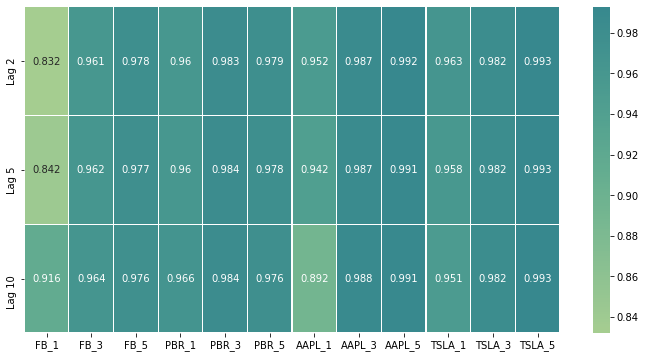

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_max, annot=True, cmap='crest', center=1., fmt='.3g', linecolor='white', linewidths=0.2)

In [34]:
res_max_op = {}
res_avg_op = {}

for data in datasets:
    max_ = []
    avg_ = []
    for sz in size:
        
        file = 'Datasets/'+str(data)+'.csv'
        nome = str(data)+'-'+str(sz)
        print(nome)
        
        df = read(file, True)
        print('READ OK')
        df = lag(df, sz, True)
        print("LAG OK")
        max_return, avg_return = training(df)
        print("TReINADO")
        
        max_.append(max_return)
        avg_.append(avg_return)
        
    res_max_op[data] = {
        'Lag 2': max_[0],
        'Lag 5': max_[1],
        'Lag 10': max_[2],
    }
    res_avg_op[data] = {
        'Lag 2': avg_[0],
        'Lag 5': avg_[1],
        'Lag 10': avg_[2],
    }
        
    print(res_max_op)

FB_1-2
READ OK
LAG OK
MAX:  0.9226047548195192
AVG:  0.7806118657775655
TReINADO
FB_1-5
READ OK
LAG OK
MAX:  0.9422750372713663
AVG:  0.711468707089614
TReINADO
FB_1-10
READ OK
LAG OK
MAX:  0.9627322181678403
AVG:  0.701320001214266
TReINADO
{'FB_1': {'Lag 2': 0.9226047548195192, 'Lag 5': 0.9422750372713663, 'Lag 10': 0.9627322181678403}}
FB_3-2
READ OK
LAG OK
MAX:  0.97710177583467
AVG:  0.9392170937069018
TReINADO
FB_3-5
READ OK
LAG OK
MAX:  0.977249070460097
AVG:  0.9388837651194019
TReINADO
FB_3-10
READ OK
LAG OK
MAX:  0.9775028263213102
AVG:  0.936318628241289
TReINADO
{'FB_1': {'Lag 2': 0.9226047548195192, 'Lag 5': 0.9422750372713663, 'Lag 10': 0.9627322181678403}, 'FB_3': {'Lag 2': 0.97710177583467, 'Lag 5': 0.977249070460097, 'Lag 10': 0.9775028263213102}}
FB_5-2
READ OK
LAG OK
MAX:  0.9858690767909252
AVG:  0.9780828566004576
TReINADO
FB_5-5
READ OK
LAG OK
MAX:  0.9860233236624671
AVG:  0.9780264495626584
TReINADO
FB_5-10
READ OK
LAG OK
MAX:  0.9852459952274918
AVG:  0.9768061

MAX:  0.9956443346458305
AVG:  0.9575962038712073
TReINADO
TSLA_5-5
READ OK
LAG OK
MAX:  0.9956365058923398
AVG:  0.9560964901802308
TReINADO
TSLA_5-10
READ OK
LAG OK
MAX:  0.9956585487924732
AVG:  0.9514528918981302
TReINADO
{'FB_1': {'Lag 2': 0.9226047548195192, 'Lag 5': 0.9422750372713663, 'Lag 10': 0.9627322181678403}, 'FB_3': {'Lag 2': 0.97710177583467, 'Lag 5': 0.977249070460097, 'Lag 10': 0.9775028263213102}, 'FB_5': {'Lag 2': 0.9858690767909252, 'Lag 5': 0.9860233236624671, 'Lag 10': 0.9852459952274918}, 'PBR_1': {'Lag 2': 0.9828691630100898, 'Lag 5': 0.9834487514395958, 'Lag 10': 0.9837076152767091}, 'PBR_3': {'Lag 2': 0.9960513289375265, 'Lag 5': 0.9960336609752309, 'Lag 10': 0.9957819512876273}, 'PBR_5': {'Lag 2': 0.9885441061111353, 'Lag 5': 0.9884269355373654, 'Lag 10': 0.9870064504896141}, 'AAPL_1': {'Lag 2': 0.949310376667956, 'Lag 5': 0.9390728862793074, 'Lag 10': 0.9267775824627444}, 'AAPL_3': {'Lag 2': 0.9934386222454757, 'Lag 5': 0.9934786742124698, 'Lag 10': 0.99304

In [35]:
df_max_op = pd.DataFrame(res_max_op)
df_max_op.head()

,FB_1,FB_3,FB_5,PBR_1,PBR_3,PBR_5,AAPL_1,AAPL_3,AAPL_5,TSLA_1,TSLA_3,TSLA_5
Lag 2,0.922605,0.977102,0.985869,0.982869,0.996051,0.988544,0.949310,0.993439,0.995747,0.962443,0.990062,0.995644
Lag 5,0.942275,0.977249,0.986023,0.983449,0.996034,0.988427,0.939073,0.993479,0.994900,0.958222,0.989988,0.995637
Lag 10,0.962732,0.977503,0.985246,0.983708,0.995782,0.987006,0.926778,0.993048,0.994720,0.960184,0.989505,0.995659


<AxesSubplot:>

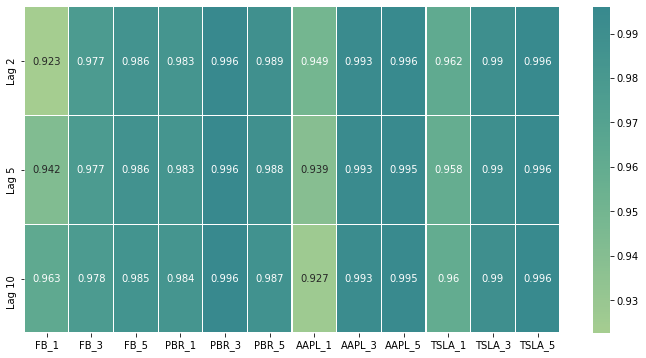

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_max_op, annot=True, cmap='crest', center=1., fmt='.3g', linecolor='white', linewidths=0.2)

### Salvando datasets

In [47]:
datasets = ['FB_1','FB_3','FB_5',
           'PBR_1','PBR_3','PBR_5',
           'AAPL_1','AAPL_3','AAPL_5',
           'TSLA_1','TSLA_3','TSLA_5']

In [42]:
def open_(file):
    df = pd.read_csv(file, index_col=0)
    df.rename(columns={'Alvo':'Close 0'}, inplace=True)
    df.drop(columns='Abertura', inplace = True)
    return df
    
def lag_(df, size):
    for i in range(1, (int(size)+1)):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    df.rename(columns={'Close 0':'Target'}, inplace=True)
    df.dropna(inplace=True)
    return df

def make_df(df):
    
    train, test = train_test_split(df, test_size = 0.25, random_state=10)
    
    return train, test

In [48]:
for d in datasets:
    file = "Datasets/"+str(d)+".csv"
    
    df = open_(file)
    df = lag_(df, 5)
    train, test = make_df(df)
    
    df_train = pd.DataFrame(train)
    df_test = pd.DataFrame(test)
    
    df_test.to_csv(str(d)+'_test.csv')
    df_train.to_csv(str(d)+'_train.csv')